# All Molecule Descriptors of Gini Coefficients from 36 NSAID-Se Derivatives

In [8]:

import pandas as pd

# Replace with your actual file path
file_path = '/Users/pipi/Documents/研究工作资料/数据/54-87des.csv'

# Read the CSV file
da = pd.read_csv(file_path)
da

,Activity,Total energy,Electronic energy,Heat of formation,HOMO eigenvalue,LUMO eigenvalue,Molecular surface area,Total dipole,Dipole x,Dipole y,...,Connolly surface area,Connolly surface occupied volume,Solvent surface area,Solvent surface occupied volume,Total energy .1,Valence energy (diag. terms),Bond energy,Angle energy,Torsion energy,Inversion energy
0,1.32634,-5244.7,-42446.4,517.10,-7.78,-2.05,508.06,3.127,1.815,-1.321,...,423.97,461.16,692.71,1256.07,619.89,573.82,480.67,80.205,10.302,2.640
1,1.21219,-4040.2,-28583.0,410.69,-7.65,-1.14,404.94,5.879,0.395,-5.655,...,345.66,357.78,593.99,1026.03,466.16,421.15,404.75,11.953,4.315,0.129
2,1.42325,-3788.7,-29514.6,481.53,-7.81,-1.34,388.59,0.778,-0.674,-0.273,...,328.12,362.77,557.35,990.44,510.82,411.44,394.74,8.618,8.006,0.074
3,1.69548,-5345.7,-45436.6,28.81,-7.76,-0.97,470.81,8.009,-5.880,2.896,...,385.25,424.75,640.65,1155.43,84.72,87.97,10.33,61.581,15.664,0.396
4,1.48287,-4014.5,-30835.5,485.32,-7.70,-1.30,418.67,4.866,-2.321,1.783,...,348.14,382.81,573.26,1038.51,1044.30,478.33,456.80,14.137,7.154,0.240
5,1.35411,-3762.8,-25295.7,373.92,-7.41,-1.08,407.24,8.856,7.148,-1.298,...,360.77,348.50,633.18,1052.95,477.89,441.40,432.09,8.618,0.686,0.015
6,1.38917,-4451.5,-36646.8,348.50,-7.55,-1.09,457.43,2.591,0.862,-1.672,...,382.25,413.03,639.97,1138.58,514.93,445.95,384.30,58.725,2.686,0.235
7,1.78390,-3374.1,-24337.9,291.25,-7.64,-1.12,398.85,4.344,2.918,-3.153,...,339.33,344.48,584.26,1002.41,334.70,323.24,309.17,12.094,1.941,0.032
8,1.71684,-3359.9,-21355.3,340.37,-7.64,-1.40,320.41,7.294,-5.872,-0.840,...,266.53,284.39,471.04,805.65,416.60,415.44,389.25,11.965,13.852,0.368
9,1.51587,-6498.8,-51557.3,238.09,-8.04,-2.03,534.55,4.214,1.209,1.243,...,431.33,481.53,707.19,1291.27,526.62,458.40,362.89,80.327,12.386,2.797


In [9]:
# Extract features and the target variable
import pandas as pd

# Read the CSV file
file_path = '/Users/pipi/Documents/研究工作资料/数据/54-87des.csv'
da = pd.read_csv(file_path)

# Extract features and the target variable
X = da.iloc[:, 1:]  # Features
y = da.iloc[:, 0]   # Target variable


rf_model = RandomForestRegressor(random_state=42)
# Run 100 iterations
num_iterations = 100
feature_importance_rankings = []

In [10]:
for _ in range(num_iterations):
    # Fit the model
    rf_model.fit(X, y)
    # Extract feature importance
    feature_importance = rf_model.feature_importances_
    # Store feature importance rankings in a list
    feature_ranking = np.argsort(feature_importance)[::-1]
    feature_importance_rankings.append(feature_ranking)
# Calculate average rankings
average_ranking = np.mean(feature_importance_rankings, axis=0)
# Output results
result_df = pd.DataFrame({'Feature': X.columns, 'Average Ranking': average_ranking + 1})
result_df = result_df.sort_values(by='Average Ranking')


In [11]:
print(result_df)

                       Feature  Average Ranking
6                Total dipole               1.0
30  Subgraph counts (1): path               2.0
17     Molecular refractivity               3.0
7                    Dipole x               4.0
31  Subgraph counts (2): path               5.0
..                         ...              ...
28   Kappa-3 (alpha modified)              78.0
32  Subgraph counts (3): path              79.0
21               Wiener index              80.0
9         Mean polarizability              81.0
27   Kappa-2 (alpha modified)              82.0

[82 rows x 2 columns]


# VIF

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
# Extract the top 20 features
top_20_features = result_df.head(20)['Feature']
# Extract features and the target variable for the top 20 features
X_top_20 = da[top_20_features]
y_top_20 = da.iloc[:, 0]  # Assuming the first column is the target variable
# Calculate VIF for the top 20 features
vif_values = pd.DataFrame()
vif_values["Feature"] = X_top_20.columns
vif_values["VIF"] = [variance_inflation_factor(X_top_20.values, i) 
                     for i in range(X_top_20.shape[1])]
print(vif_values)

                            Feature            VIF
0                     Total dipole       11.081959
1        Subgraph counts (1): path   521221.087859
2           Molecular refractivity     4650.522371
3                         Dipole x        1.928439
4        Subgraph counts (2): path    91464.939826
5                   Torsion energy       13.423716
6                  LUMO eigenvalue      117.006079
7                    Element count     6059.353140
8                  HOMO eigenvalue     4714.539001
9        Vertex distance/magnitude    23435.425483
10     E-state keys (sums): S_aaCH       31.425968
11  Shadow area fraction: XY plane      177.896626
12               Shadow length: LZ      368.091511
13                    Shadow ratio      185.207072
14                         Kappa-2    22159.934995
15         Edge distance/magnitude    15312.571068
16                         Chi (1)   420535.670428
17     E-state keys (sums): S_aasC       28.397938
18               Electronic ene

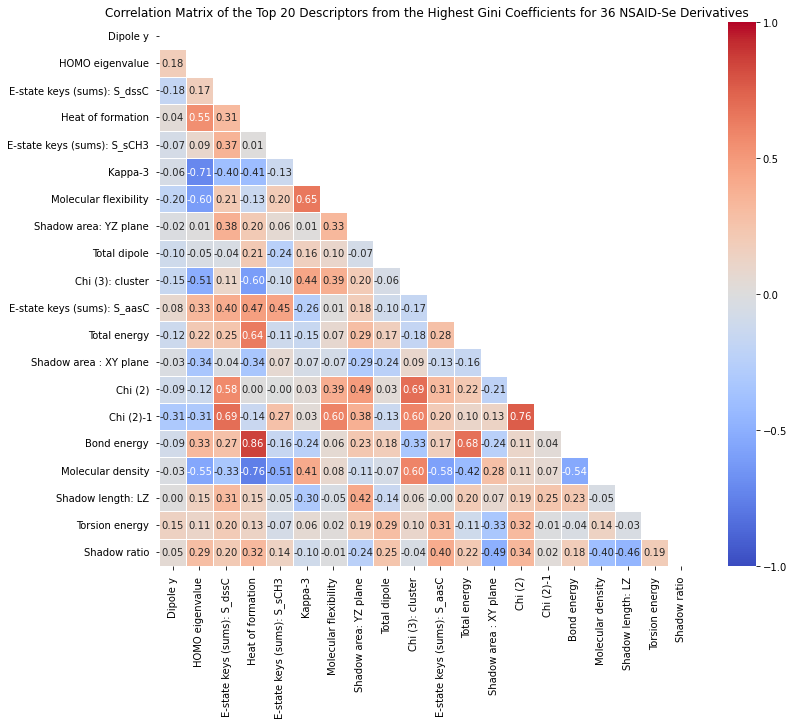

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Read the CSV file
file_path = '/Users/pipi/Documents/研究工作资料/数据/54-20des.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path, index_col=0)  # Assuming the first column of the CSV file is the index

# Standardize the data
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Calculate the standardized correlation matrix
corr_matrix_standardized = df_standardized.corr()

# Create an upper triangular mask
mask = ~np.tri(corr_matrix_standardized.shape[0], k=-1, dtype=bool)
# Set diagonal values to 1
np.fill_diagonal(corr_matrix_standardized.values, 1)

# Set the color mapping range from -1 to 1 and display 1 on the diagonal
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix_standardized, annot=True, cmap='coolwarm', fmt=".2f", 
                      linewidths=.5, mask=mask, vmin=-1, vmax=1, 
                      cbar_kws={"ticks": [-1, -0.5, 0, 0.5, 1]})

plt.title('Correlation Matrix of the Top 20 Descriptors from the Highest Gini Coefficients for 36 NSAID-Se Derivatives')
# plt.savefig('/Users/pipi/cc20 Descriptors.svg', format='svg', bbox_inches='tight')
plt.show()
